In [146]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

**LOADING DATA**

In [147]:
data = pd.read_csv('train_data.csv')
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


**CHECKING FOR NULL VALUES**

In [149]:
data.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

**CREATING TARGET COLUMN**

The dataset has no target column. However, the business goal is on employee attrition. That mean employes whose last date is known are those who left the company. Hence, this can be manipulated to create a target column

In [150]:
data['Target']=np.where(data['LastWorkingDate'].isnull(),0,1)
data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [151]:
data['Target'].value_counts()

0    17488
1     1616
Name: Target, dtype: int64

**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [152]:
data.nunique()

MMM-YY                     24
Emp_ID                   2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Salary                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Designation                 5
Total Business Value    10181
Quarterly Rating            4
Target                      2
dtype: int64

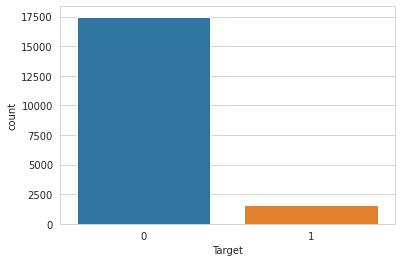

In [153]:
sns.countplot('Target', data=data)

The count plot on the target column shows that the data is not balanced. SMOTE might be necessary. This will be taken into considerationa after tarining models and check for the accuracy

In [154]:
data.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Target'],
      dtype='object')

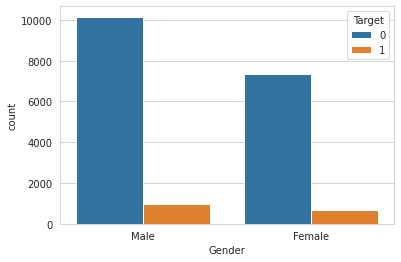

In [155]:
sns.countplot('Gender', data=data, hue='Target')

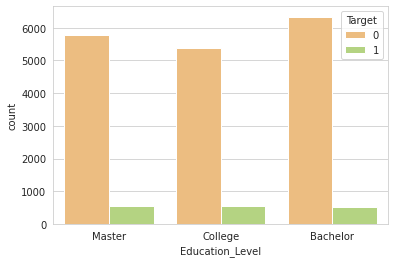

In [156]:
sns.countplot('Education_Level', data = data,  hue = 'Target', palette = 'RdYlGn')

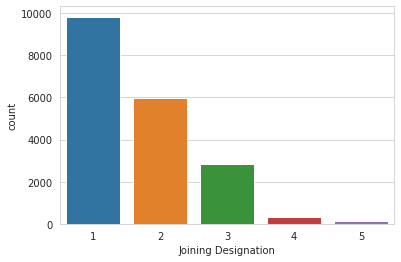

In [157]:
sns.countplot('Joining Designation', data=data)

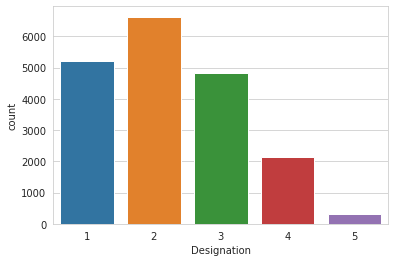

In [158]:
sns.countplot('Designation', data=data)

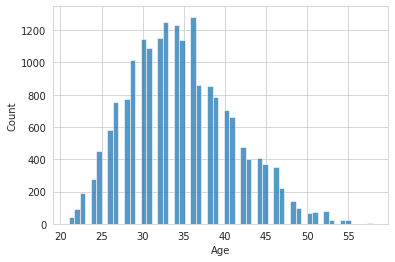

In [159]:
sns.histplot(data['Age'])

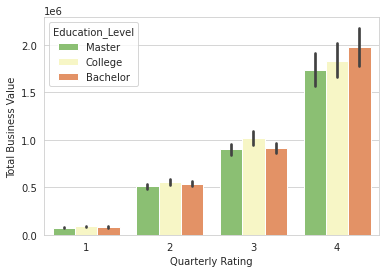

In [160]:
sns.barplot(x='Quarterly Rating',y='Total Business Value', hue = 'Education_Level', data =data, palette="RdYlGn_r")

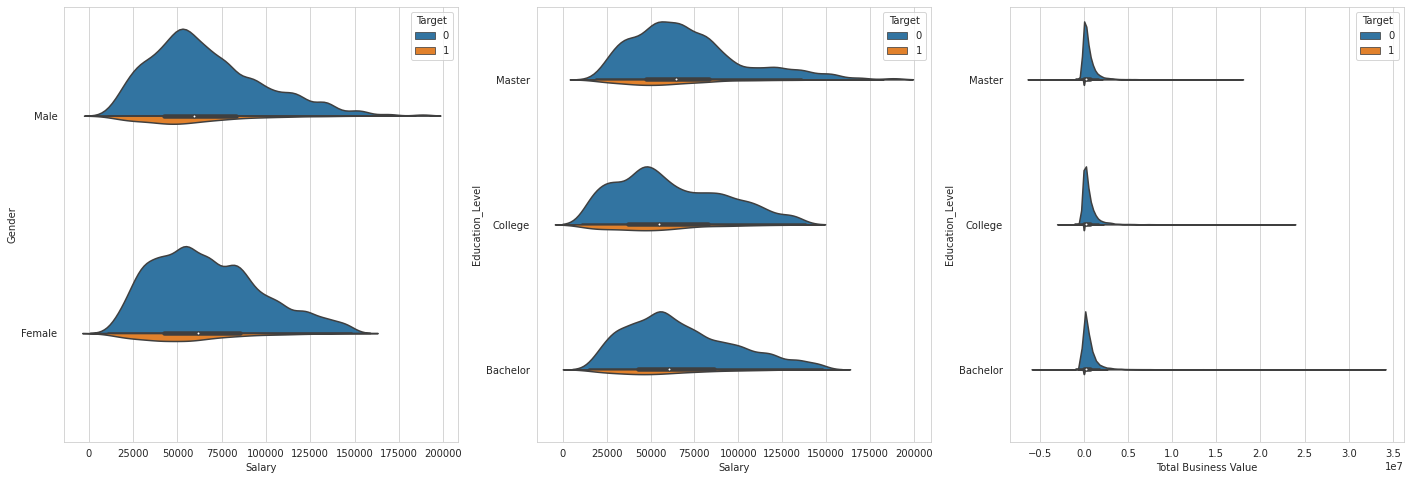

In [161]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.violinplot(data=data, y='Gender', x='Salary', hue='Target', split=True, scale='count')
plt.subplot(1,3,2)
sns.violinplot(data=data, y='Education_Level', x='Salary', hue='Target', split=True, scale='count')
plt.subplot(1,3,3)
sns.violinplot(data=data, y='Education_Level', x='Total Business Value', hue='Target', split=True, scale='count')
plt.show()

In [162]:
FET = data.drop(['Target', 'Emp_ID'],axis=1)
TAR= data['Target']

In [164]:
FET.corr()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
Age,1.000000,0.192225,-0.005726,0.211515,0.109426,0.172660
Salary,0.192225,1.000000,0.380878,0.778383,0.234044,0.116897
Joining Designation,-0.005726,0.380878,1.000000,0.559854,-0.044446,-0.237791
Designation,0.211515,0.778383,0.559854,1.000000,0.220955,0.014445
Total Business Value,0.109426,0.234044,-0.044446,0.220955,1.000000,0.471224
Quarterly Rating,0.172660,0.116897,-0.237791,0.014445,0.471224,1.000000


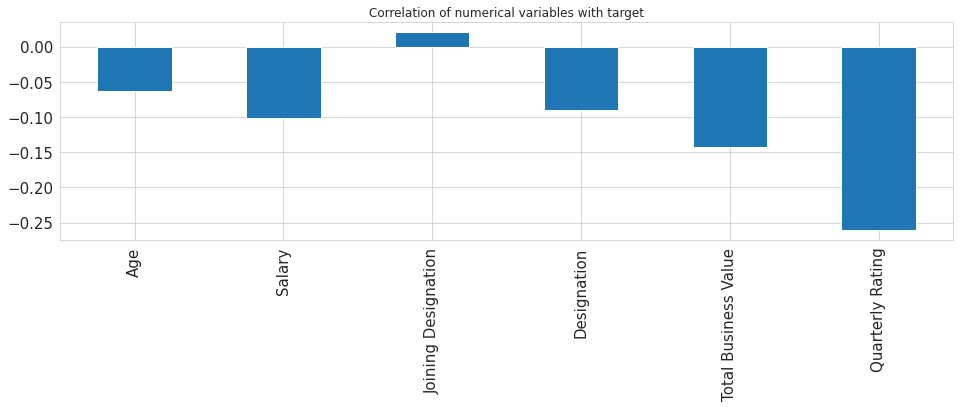

In [163]:
FET.corrwith(TAR).plot.bar(figsize = (16, 4), title = "Correlation of numerical variables with target", fontsize = 15, rot = 90, grid = True)

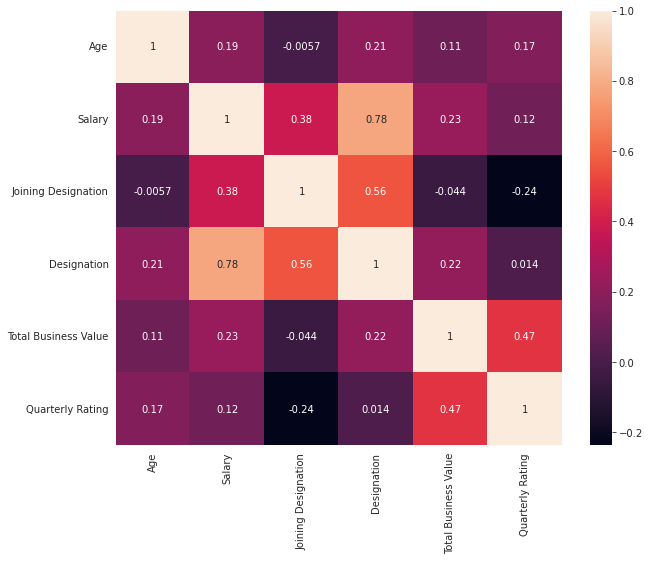

In [184]:
plt.figure(figsize=(10,8))
sns.heatmap(FET.corr(), annot=True)

*The correlation plot show that all numerical variales but joining designation are negatively related to the attrition variable (target). This makes sense. However, the company needs to work on intial designation. *

**ENCODING CATEGORICAL VARIABLES AND DROPING UNNECESSARY COLUMNS**

In [165]:
data=data.drop(columns=['MMM-YY', 'Emp_ID', 'LastWorkingDate', 'Dateofjoining'], axis =1)

In [166]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Gender'] = encode.fit_transform(data['Gender'])
data['City'] = encode.fit_transform(data['City'])
data['Education_Level'] = encode.fit_transform(data['Education_Level'])

In [167]:
data = data.drop_duplicates()

In [168]:
data.head()

,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,28,1,15,2,57387,1,1,2381060,2,0
1,28,1,15,2,57387,1,1,-665480,2,0
2,28,1,15,2,57387,1,1,0,2,1
3,31,1,26,2,67016,2,2,0,1,0
5,43,1,4,2,65603,2,2,0,1,0


In [169]:
data.shape

(16695, 10)

**SPLITTING DATA INTO TRAINING AND TEST SET**

In [170]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [171]:
X_train = train.drop(['Target'], axis = 1)
y_train = train['Target']           
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)

Dimension of train_x dataframe: (13356, 9)
Dimension of train_y dataframe: (13356,)


In [172]:
X_test = test.drop(['Target'], axis = 1)
y_test = test['Target']           
print('Dimension of train_x dataframe:',X_test.shape)
print('Dimension of train_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (3339, 9)
Dimension of train_y dataframe: (3339,)


**SCALING**

In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**MODEL TRAINING AND VALIDATION**

**LOGISTIC REGRESSION**

In [174]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [175]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score
y_pred = regressor.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8984725965858041
Confusion Matrix:  [[3000   11]
 [ 328    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3011
           1       0.00      0.00      0.00       328

    accuracy                           0.90      3339
   macro avg       0.45      0.50      0.47      3339
weighted avg       0.81      0.90      0.85      3339



**KNEIGHBORS CLASSIFIER**

K=3

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8643306379155435
Confusion Matrix:  [[2865  146]
 [ 307   21]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3011
           1       0.13      0.06      0.08       328

    accuracy                           0.86      3339
   macro avg       0.51      0.51      0.51      3339
weighted avg       0.83      0.86      0.84      3339



K=5

In [177]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8772087451332734
Confusion Matrix:  [[2917   94]
 [ 316   12]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3011
           1       0.11      0.04      0.06       328

    accuracy                           0.88      3339
   macro avg       0.51      0.50      0.49      3339
weighted avg       0.82      0.88      0.85      3339



**NAiVE BAYES**

In [178]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)
y_pred = nvclassifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7942497753818508
Confusion Matrix:  [[2386  625]
 [  62  266]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3011
           1       0.30      0.81      0.44       328

    accuracy                           0.79      3339
   macro avg       0.64      0.80      0.66      3339
weighted avg       0.91      0.79      0.83      3339



Since the dataset is imbalanced, the model accuracy for logstic regression and KNNis very poor! But Naive Baye's performed very well.  Let's try SMOTE and see the difference.

**SMOTE**

In [179]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample (X_train, y_train)
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 12068, 1: 1288})
After SMOTE:  Counter({0: 12068, 1: 12068})


**LOGISTIC REGRESSION (AFTER SMOTE)**

In [180]:
regressor.fit(X_train_smote, y_train_smote)
y_pred = regressor.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7651991614255765
Confusion Matrix:  [[2258  753]
 [  31  297]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      3011
           1       0.28      0.91      0.43       328

    accuracy                           0.77      3339
   macro avg       0.63      0.83      0.64      3339
weighted avg       0.92      0.77      0.81      3339



**K-NEIGHBORS CLASSIFIER (AFTER SMOTE)**

In [181]:
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7669961066187482
Confusion Matrix:  [[2398  613]
 [ 165  163]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      3011
           1       0.21      0.50      0.30       328

    accuracy                           0.77      3339
   macro avg       0.57      0.65      0.58      3339
weighted avg       0.86      0.77      0.80      3339



SMOTE has siginificantly improved the model accuracy!

**CONCLUSION: **Naive Baye's model is the best to predict employee attrition for the given dataset with overall model accuracy of 80%